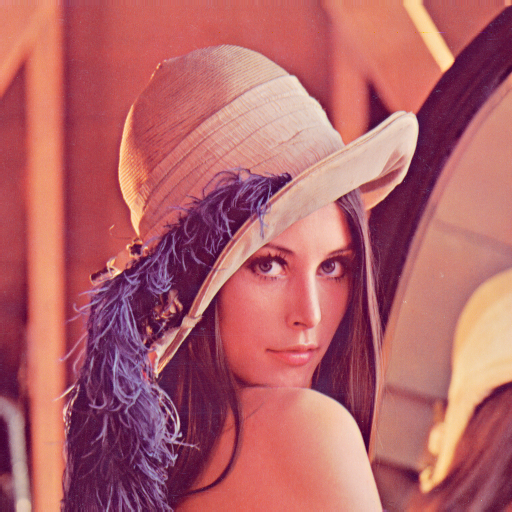

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read the image in BGR format
image = cv2.imread('Lena_Image.png')
cv2_imshow(image)

In [ ]:
height, width, channels = image.shape
print(f'Image size: {width}x{height} pixels')

total_pixels = height * width
print(f'Total number of pixels: {total_pixels}')

Image size: 512x512 pixels
Total number of pixels: 262144


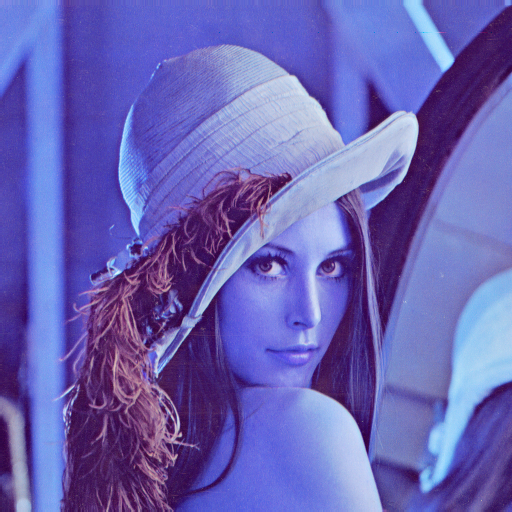

In [ ]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_image)

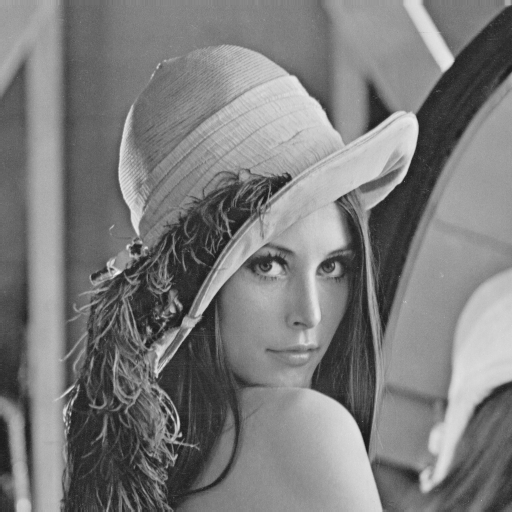

In [ ]:
grey_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
cv2_imshow(grey_image)

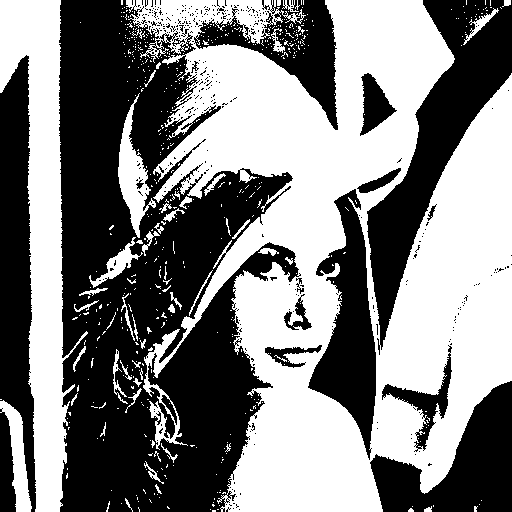

In [ ]:
binary_image = cv2.threshold(grey_image, 128, 255, cv2.THRESH_BINARY)[1]
cv2_imshow(binary_image)

In [ ]:
black_pixel_count = (binary_image == 0).sum()
print(f'Area of black pixels: {black_pixel_count}')
print(f'Size of the image: {height * width}')

Area of black pixels: 130547
Size of the image: 262144


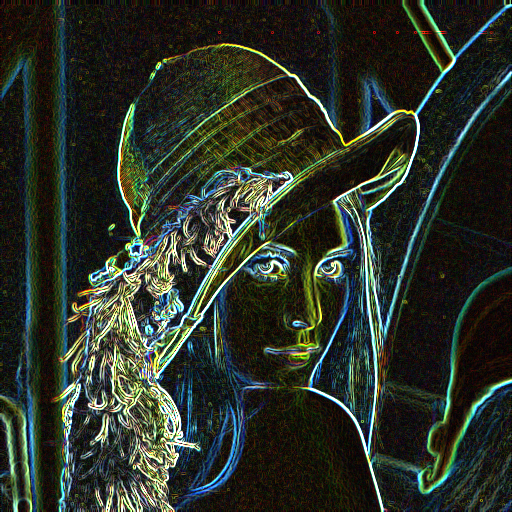

In [ ]:
sobelx = cv2.Sobel(rgb_image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(rgb_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
cv2_imshow(sobel)

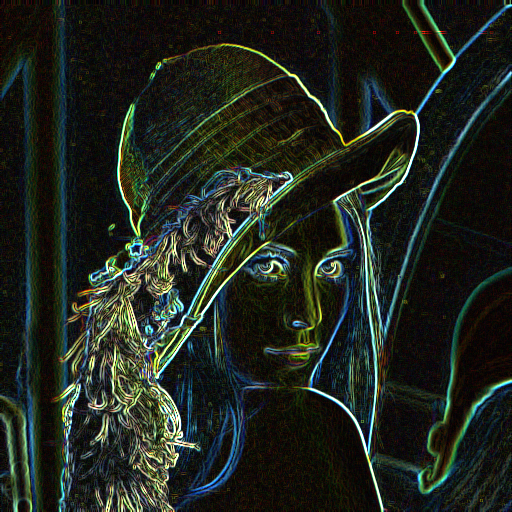

In [ ]:
import numpy as np
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)

prewittx = cv2.filter2D(rgb_image, cv2.CV_64F, kernelx)
prewitty = cv2.filter2D(rgb_image, cv2.CV_64F, kernely)

# Calculate the magnitude of the gradient
prewitt = cv2.magnitude(prewittx, prewitty)
cv2_imshow(prewitt)

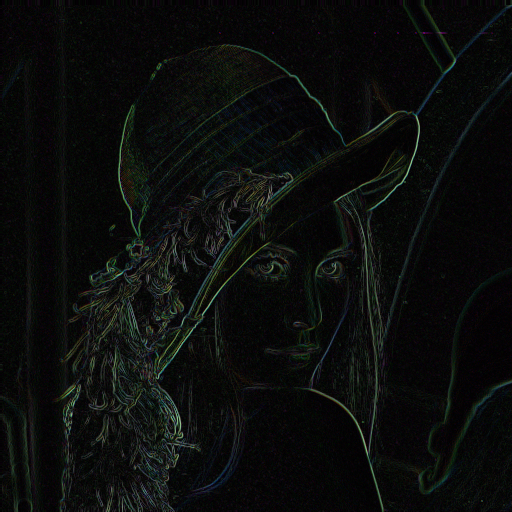

In [ ]:
kernelx = np.array([[1, 0], [0, -1]], dtype=int)
kernely = np.array([[0, 1], [-1, 0]], dtype=int)

robertsx = cv2.filter2D(rgb_image, cv2.CV_64F, kernelx)
robertsy = cv2.filter2D(image, cv2.CV_64F, kernely)
robert = cv2.magnitude(robertsx, robertsy)
cv2_imshow(robert)

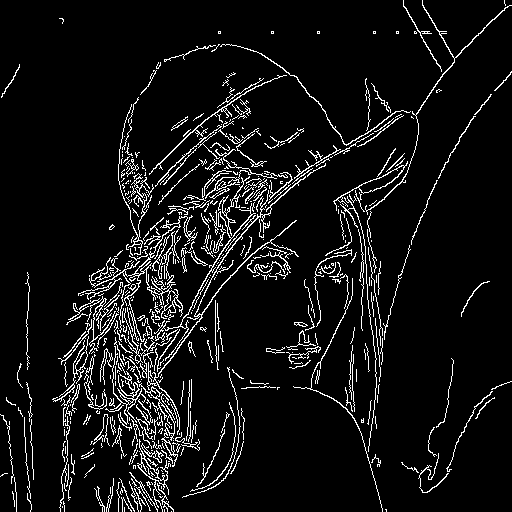

In [ ]:
# Canny Edge Detection
edges = cv2.Canny(rgb_image, 100, 200)
cv2_imshow(edges)

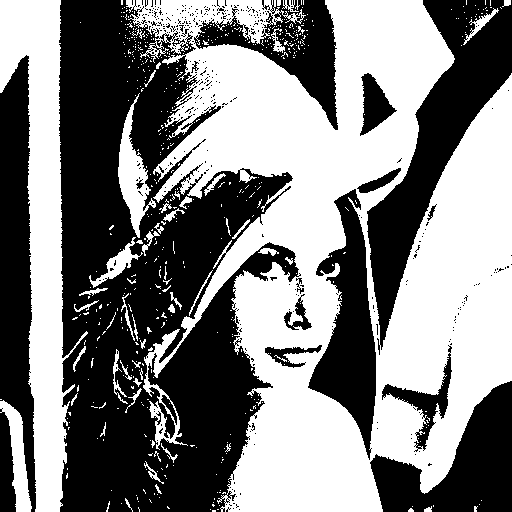

In [ ]:
ret, thresh = cv2.threshold(binary_image, 128, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

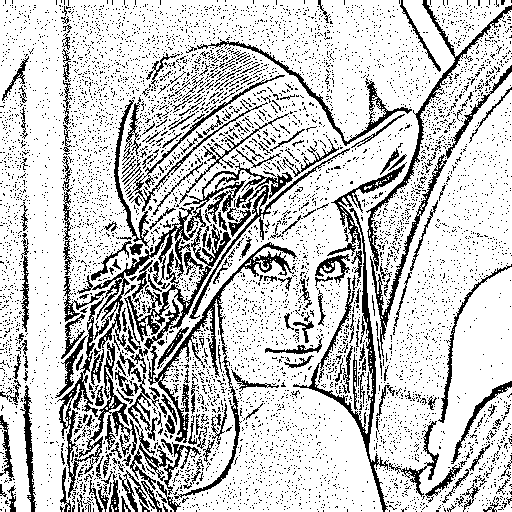

In [ ]:
# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(grey_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 4)
cv2_imshow(adaptive_thresh)

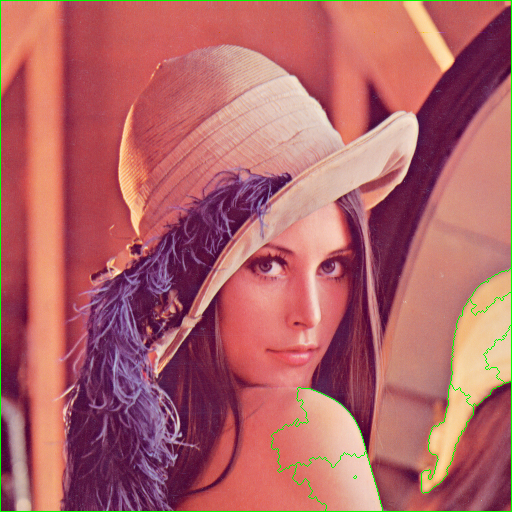

In [ ]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(adaptive_thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# Finding sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
image[markers == -1] = [0,255,0]

cv2_imshow(image)